In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Where We Left Off
From last lecture, we were analyzing US Census Population Data 2010-2015. We compared the differences in population between 2010 and 2015 and found out that there were a lot more people who were 68 years old, possibly due to the effect of World War 2.

Now we are analyzing the gender ratios in year 2015, where we found that there were more male infants than female infants, but there were more female population overall! Why is that?

## Continuing from Yesterday

In [2]:
full_census_table = Table.read_table('census.csv')
us_pop = (full_census_table
          .select('SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2015')
          .relabeled('POPESTIMATE2010', '2010').relabeled('POPESTIMATE2015', '2015'))
us_pop_2015 = us_pop.drop('2010')
us_pop_2015

SEX,AGE,2015
0,0,3978038
0,1,3968564
0,2,3966583
0,3,3974061
0,4,4020035
0,5,4018158
0,6,4019207
0,7,4148360
0,8,4167887
0,9,4133564


We are going to compare the male population and the female population for each age. To do this, we need to separate the tables to 2 tables, males and females. We also need to exclude the row where the `AGE` is 999.

In [3]:
females = us_pop_2015.where('SEX', 2).where('AGE', are.not_equal_to(999))
females

SEX,AGE,2015
2,0,1942904
2,1,1939269
2,2,1939979
2,3,1943417
2,4,1964111
2,5,1967310
2,6,1968544
2,7,2031242
2,8,2039062
2,9,2021886


In [4]:
males = us_pop_2015.where('SEX', 1).where('AGE', are.not_equal_to(999))
males

SEX,AGE,2015
1,0,2035134
1,1,2029295
1,2,2026604
1,3,2030644
1,4,2055924
1,5,2050848
1,6,2050663
1,7,2117118
1,8,2128825
1,9,2111678


Next, we are going to create a table that shows the ratio between females and males.

In [5]:
# Grab the `AGE` column from either `males` table or `females` table
ages = females.column('AGE')

In [6]:
# Now create the table
ratios = Table().with_columns(
    'AGE', ages,
    '2015 F:M RATIO', females.column('2015') / males.column('2015'),
)
ratios

AGE,2015 F:M RATIO
0,0.954681
1,0.955637
2,0.957256
3,0.957045
4,0.955342
5,0.959267
6,0.959955
7,0.959437
8,0.957834
9,0.957478


Above, it seems like there were more male babies and young children. But remember that there were more females overall, so there has to be an age range where the ratio is greater than one! Let's try 75 years and older.

In [7]:
ratios.where('AGE', are.above(75))

AGE,2015 F:M RATIO
76,1.22268
77,1.24979
78,1.27447
79,1.30076
80,1.33674
81,1.36432
82,1.40552
83,1.44827
84,1.49756
85,1.55627


Indeed! For 75 years and older, there were significantly more females than males! We can try visualize this data,

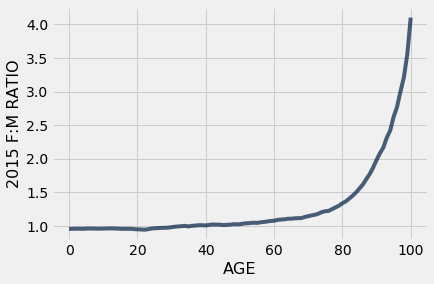

In [8]:
ratios.plot('AGE')

From the plot above, it seems that for young population, there were about the same amount of males and females. As the population gets older, there were significantly more females than males! This is an example of how useful a visualization is since we can see the trend of all ages compared to just using tables.

# Data Visualization
Data visualization is one powerful tool in data science that allows us to see multiple numbers and data on the same time. 

## Discussion Question

<img src= 'smartphone.JPG' width = 350/>

Which of the following questions can be answered with the chart above?

Among survey responders...
1. What proportion did **not** use their phone for **online banking**?
    * Ans: Yes. Just calculate 100 - % of people who do online banking
    
2. What proportion either used their phone for **online banking** or to **look up real estate listings**?
    * Ans: Can't be answered. We don't know the percentage of people who do both.
    
3. Did everyone use their phone for at least one of these activities?
    * Ans: Can't be answered
    
4. Did anyone use their phone for both **online banking** and **real estate**?
    * Ans: Can't be answered


## Area Principle
In data science, one principal that we need to obey is that **areas should be proportional to the values they represent**. We, as humans, perceive big objects as more important compared to small objects. For example.
<img src = 'area.jpg' width = 600/>

It seems as if the male car is twice as big as the size of female car. This is misleading because it makes it seem that the are twice as much accidents caused by male driver.

# Visualization
`A picture is worth a thousand numbers.`

## Demo

Below we have a dataset of 50 famous actors. Here are explanations about some of the labels in the table:

1. Total Gross: Total amount of money made from all the movies, in million dollars
2. Average per move: Average amount of money made per movie, in million dollars
3. Gross: The amount of money made from the #1 movie alone

In [20]:
actors = Table.read_table('actors.csv')
actors

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


First of all, we will analyze the relationship between the number of movies produced and the total gross. We will use a `scatter` plot, where it takes a column label as the first argument as the x-axis, and another column label as the second argument for the y-axis. In this case, we want `Number of Movies` as the x-axis and `Total Gross` as the y-axis.

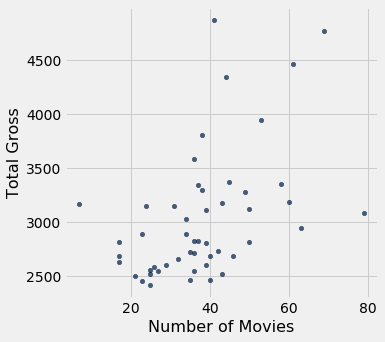

In [10]:
actors.scatter('Number of Movies', 'Total Gross')

Above, it might not seem too obvious, but there is a trend that the more movies produced, the more total gross an actor made. However, if we look at the scatter plot of `Number of Movies` vs. `Average per Movie`,

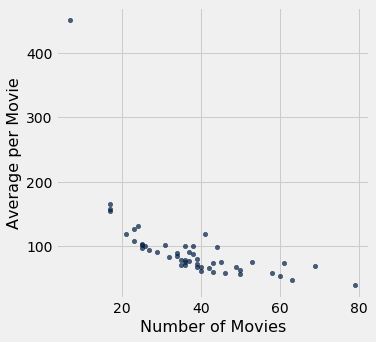

In [21]:
actors.scatter('Number of Movies', 'Average per Movie')

Above, there is a clear trend that the more movies an actor released, the less the average per movie. This is because the greater number of movie, the greater the number that divides the total gross. 

There is a strange data point on the far top left. It seems that there is an actor that released less than 10 movies but made a lot more money! If we analyze that data point,

In [12]:
actors.where('Number of Movies', are.below(10))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7


We have **Anthony Daniels**, who had 7 movies. This is because the whole 7 movies he played were the Star Wars series, where he played the droid character C-3PO.

Looking at the visualization gives us ideas on what to analyze. 

#### Change Dataset
Now we are going to analyze the dataset `movies_by_year` that shows:

1. The total gross made out of all movies released in that year
2. The number of movies released in that year
3. #1 Movie of that year based on the total grossing

In [13]:
movies = Table.read_table('movies_by_year.csv')
movies

Year,Total Gross,Number of Movies,#1 Movie
2015,11128.5,702,Star Wars: The Force Awakens
2014,10360.8,702,American Sniper
2013,10923.6,688,Catching Fire
2012,10837.4,667,The Avengers
2011,10174.3,602,Harry Potter / Deathly Hallows (P2)
2010,10565.6,536,Toy Story 3
2009,10595.5,521,Avatar
2008,9630.7,608,The Dark Knight
2007,9663.8,631,Spider-Man 3
2006,9209.5,608,Dead Man's Chest


Again, we can visualize the data using a `scatter` plot. We will analyze the relationship between the `Year` and `Number of Movies`

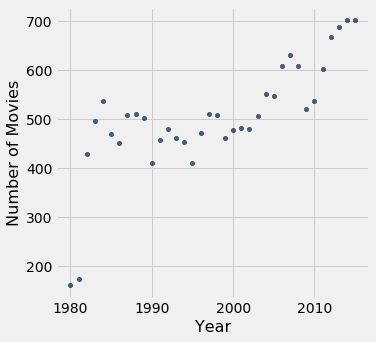

In [14]:
movies.scatter('Year', 'Number of Movies')

We can see in general that as time goes by, the number of movies released generally increased. However, it is more useful to create a **line graph** of this visualization. The `Table` method `plot` produces a line graph, and works similarly as the `scatter` method.

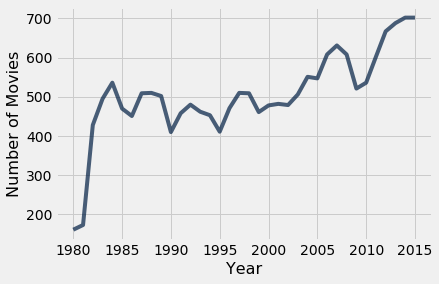

In [15]:
movies.plot('Year', 'Number of Movies')

If we want to analyze the movies after the year 2000, we can't just zoom in the plot. Instead, we need to create a data table that contains only the desired data points, then make a plot out of it.

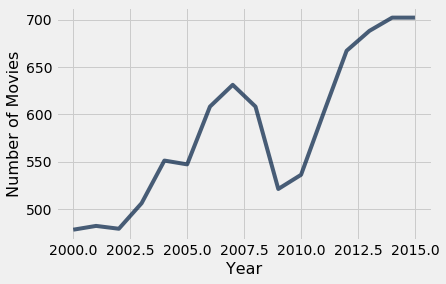

In [16]:
century_21 = movies.where('Year', are.above(1999))
century_21.plot('Year', 'Number of Movies')

We can also analyze the total gross for the years after 2000.

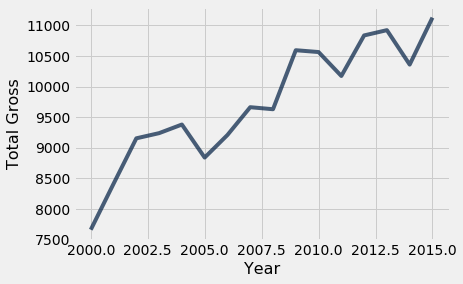

In [17]:
century_21.plot('Year', 'Total Gross')

Above, we can see the general trend that the total gross increases overtime.

It does not matter if the years in the table is not in order. Most of the plotting methods would be able to figure out the axis in order.

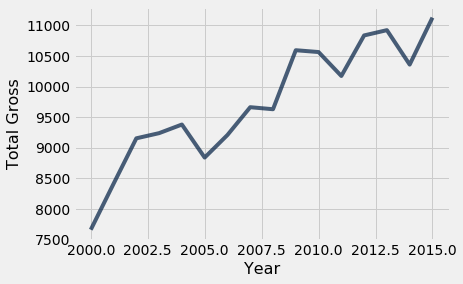

In [18]:
century_21.sample(with_replacement = False).plot('Year', 'Total Gross')

Now back to `century_21` table,

In [19]:
century_21

Year,Total Gross,Number of Movies,#1 Movie
2015,11128.5,702,Star Wars: The Force Awakens
2014,10360.8,702,American Sniper
2013,10923.6,688,Catching Fire
2012,10837.4,667,The Avengers
2011,10174.3,602,Harry Potter / Deathly Hallows (P2)
2010,10565.6,536,Toy Story 3
2009,10595.5,521,Avatar
2008,9630.7,608,The Dark Knight
2007,9663.8,631,Spider-Man 3
2006,9209.5,608,Dead Man's Chest


Comparing the year 2009 and 2010, year 2010 made more movies but year 2009 made total gross! Why is that?

This is because in 2009, the movie **Avatar** was released. **Avatar** made a huge amount in total gross.

# Numerical Data
So far, our data analysis mostly involved numerical data. However, there are many different types of data out there.

## Types of Data
Most visualizations work only on certain types. There are very few visualization that work for all types of data. Thus, it is important to understand the type of data we are working on and which visualization would work for them.

When we want to do a data visualization, make sure that **every value in the column to be the same type and comparable in some way**. One example of this would be the `census` example, where there was the `AGE` value 999. This value is not comparable to other `AGE` because the `AGE` 999 consists of the total population.

Types of data out there:
1. Numerical - Each value is from a fixed scale
    * Numerical measurements are ordered
        * e.g. 1 before 10, 10 before 400.
    * Differences between the data are typically meaningful
        * e.g. 20 dollars is twice as good as 10 dollars
        * 100 dollars is 10 times as good as 10 dollars
2. Categorical - Each value is from a fixed inventory (set of values)
    * May or may not have an ordering
        * e.g. T-shirts worn in class: red, blue, green etc - no ordering
        * T-shirts size: S, M, L, XL - there is an order
    * Categories are either the same or different
        * e.g. S is not necessarily twice as small as M
        * It's more difficult to do comparison with categories

## Terminology
These are some terms that might be helpful for data visualization.
1. `Individuals`: those whose features are recorded
2. `Variables`: features owned by `individuals`. Typically in form of column
    * Variables have different `values`
        * `Values` can be `numerical`, `categorical`, or other types that we haven't covered
3. `Distribution`: instead of counting the number of individuals, we group individuals together and look at the frequencies
    * e.g. there are 10 small, 20 medium and 30 large t-shirts in this class
    * Frequency is measured in counts. Later on we will use proportions or percentage (%)

## Plotting 2 Numerical Variables
We have looked at 2 plots so far: the **scatter plot** with `scatter` method:

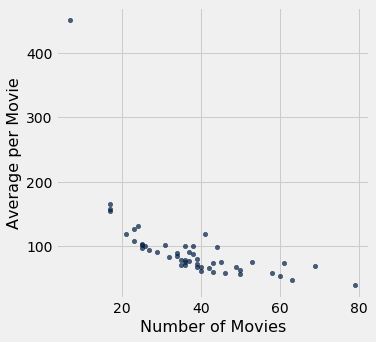

In [22]:
actors.scatter('Number of Movies', 'Average per Movie')

We generally use scatter plots since they work on a lot of numerical data. 


When the data are numerical and there is only one y-axis value for every value in x-axis, we use **Line graph** with `plot` method. Using this plot, the difference in the y-value for each x-axis is meaningful.

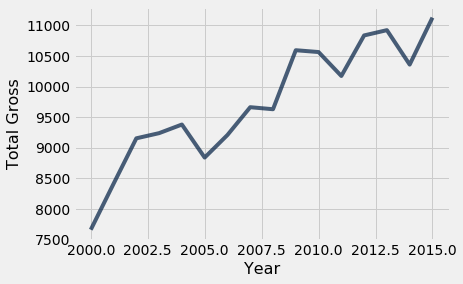

In [23]:
century_21.plot('Year', 'Total Gross')

But all in all, it all depends on how we judge the situation to decide which visualization to use.

# Categorical Data
## Demo
This time, we are going to use the `top` table that contains the top grossing movies, sorted by their Gross amount. The label `Gross (Adjusted)` means the gross amount, adjusted for inflation.

In [24]:
top = Table.read_table('top_movies.csv')
top

Title,Studio,Gross,Gross (Adjusted),Year
Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015
Avatar,Fox,760507625,846120800,2009
Titanic,Paramount,658672302,1178627900,1997
Jurassic World,Universal,652270625,687728000,2015
Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012
The Dark Knight,Warner Bros.,534858444,647761600,2008
Star Wars: Episode I - The Phantom Menace,Fox,474544677,785715000,1999
Star Wars,Fox,460998007,1549640500,1977
Avengers: Age of Ultron,Buena Vista (Disney),459005868,465684200,2015
The Dark Knight Rises,Warner Bros.,448139099,500961700,2012


We can take the top 5 of the movies and the `barh` method to create a bar chart. The `barh` method takes a column of category as the first argument and the values as the second argument.

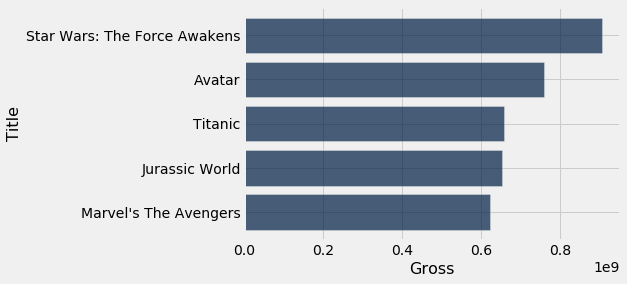

In [26]:
top5 = top.take(np.arange(5))
top5.barh('Title', 'Gross')

Notice that the x-axis is converted automatically to scientific notation. We can also create a vertical bar chart withs data but we did not because the title of the movies are too long. If we create a vertical bar chart, the result would be as the following,

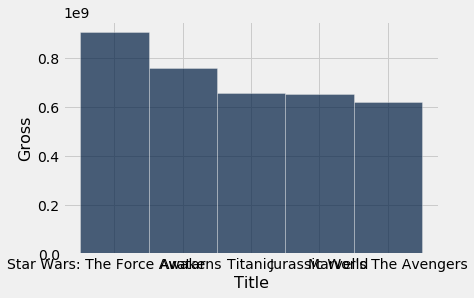

In [27]:
top5.bar('Title', 'Gross')

Now we will make a bar chart based on the adjusted gross:

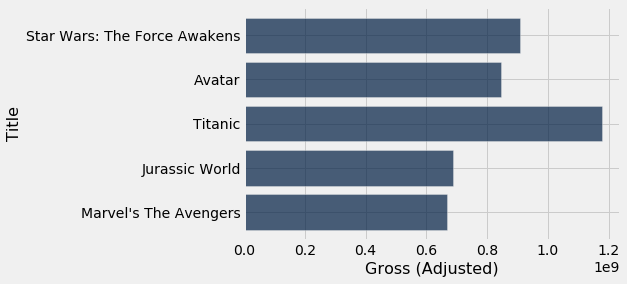

In [28]:
top5.barh('Title', 'Gross (Adjusted)')

Above, Star Wars doesn't seem to be the movie that made the most adjusted gross! It might be the case that there are movies outside this "top 5" that made more in adjusted gross! What if we want to do another top 5 (adjusted) grossing movies?

We can reorder the original table with respect to adjusted gross and take the top 5 again!

In [29]:
top.sort(3, descending=True).take(np.arange(5))

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1757788200,1939
Star Wars,Fox,460998007,1549640500,1977
The Sound of Music,Fox,158671368,1239013800,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1234132700,1982
Titanic,Paramount,658672302,1178627900,1997


The movie **Gone with the Wind**, even thought didn't make much in terms of gross, turns out made the most after adjusted for inflation! 

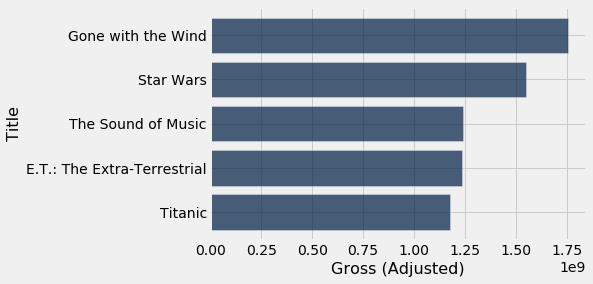

In [30]:
top.sort(3, descending=True).take(np.arange(5)).barh('Title', 3)

Unlike the scatter plot and the line graph, bar charts do not automatically order the data points. Below is an example, 

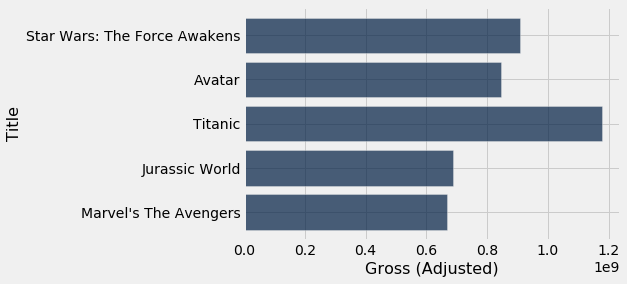

In [31]:
top5.barh('Title', 'Gross (Adjusted)')

We can use bar charts to compare more than one values on the same time! Below is an example of movies comparison with respect to the grossing and the adjusted grossing,

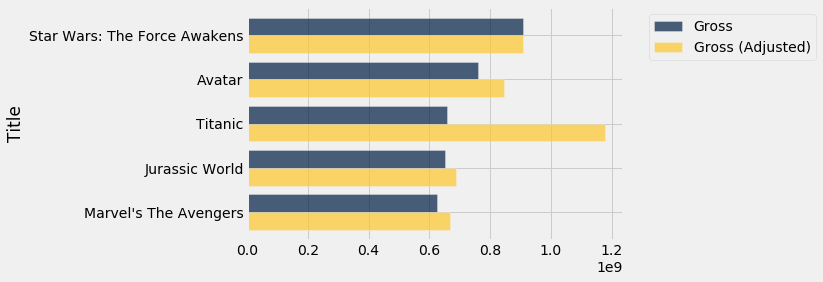

In [32]:
top5.select('Title', 'Gross', 'Gross (Adjusted)').barh('Title')

Note that we can do above with numerical data. If we included the column 'Studio' and tried to create a bar chart out of the table, we will get an error!

In [33]:
top5.barh('Title')

ValueError: The column 'Studio' contains non-numerical values. A plot cannot be drawn for this column.

If we want to know how many movies were released by certain studios, we can use the `group` method to group movies together based on a certain value. This method will give us a distribution.

In [34]:
studios = top.group('Studio')
studios

Studio,count
AVCO,1
Buena Vista (Disney),29
Columbia,10
Disney,11
Dreamworks,3
Fox,26
IFC,1
Lionsgate,3
MGM,7
MPC,1


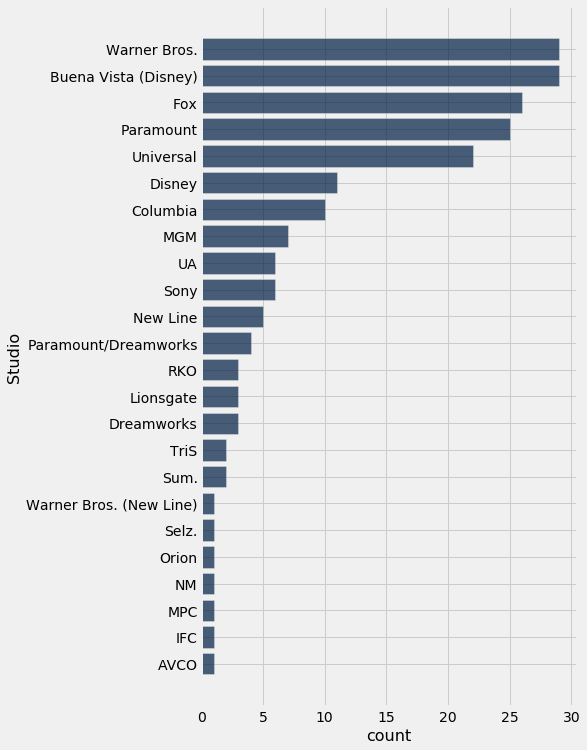

In [35]:
studios.sort('count', descending=True).barh('Studio')

## "Numerical" Data
Just because the values are numbers, doesn't mean the variable is numerical. An example is the `SEX` in `census` table has numerical code 0, 1, and 2.

1. It doesn't make sense to do operations to these numbers. 
2. Even though numbers were used as codes, the variable `SEX` is still categorical.

## Categorical Distributions
We talked about `barh` method for creating bar charts. This method displays a categorical distribution.

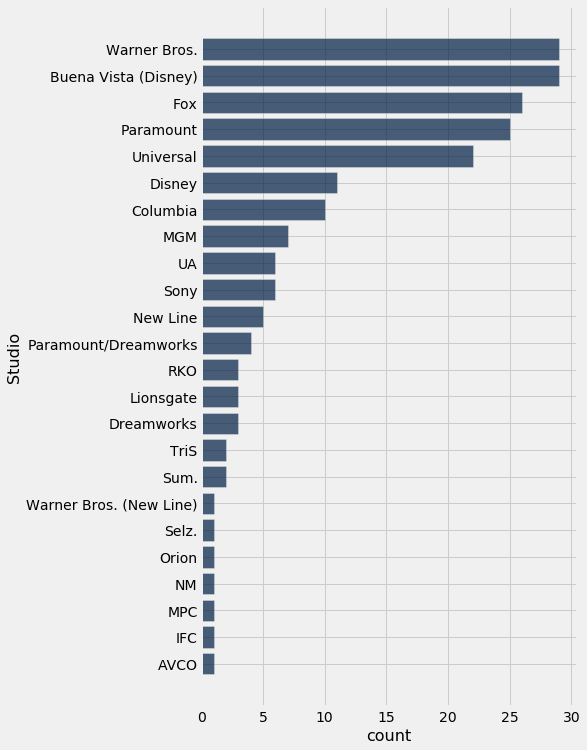

In [36]:
studios.sort('count', descending=True).barh('Studio')

But when the values of the variable have a rank ordering, or fixed sizes relative to each other, we need to be careful with how we order the results since there might be different options of visualization that we can use. 